In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data generate X,Y
def generateDataset(m):

    x = np.random.random(m)*10
    noise = np.random.random(100)
    y = 3*x + 1 + 4*noise

    print(x.mean(),x.std())# x.mean() mean of x and x.std() is standard deviation of x
    return x,y


In [3]:
X,y = generateDataset(100)
print(X.shape,y.shape)

5.255678399631487 2.9275878393147283
(100,) (100,)


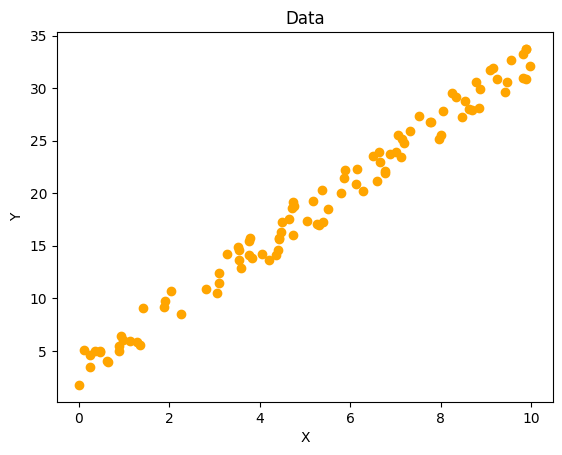

In [4]:
def plotData(x,y,color = "orange",title = "Data"):
   plt.title(title)
   plt.xlabel("X")
   plt.ylabel("Y")
   plt.scatter(x,y,c = color)
   plt.show()

plotData(X,y)   

In [5]:
def normalisedata(X):
    X = (X-X.mean())/X.std()
    return X

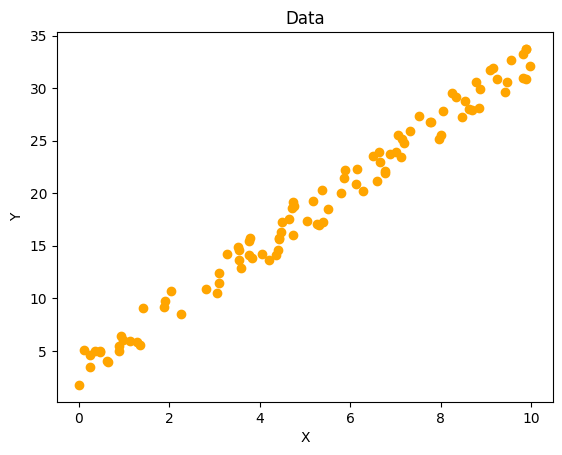

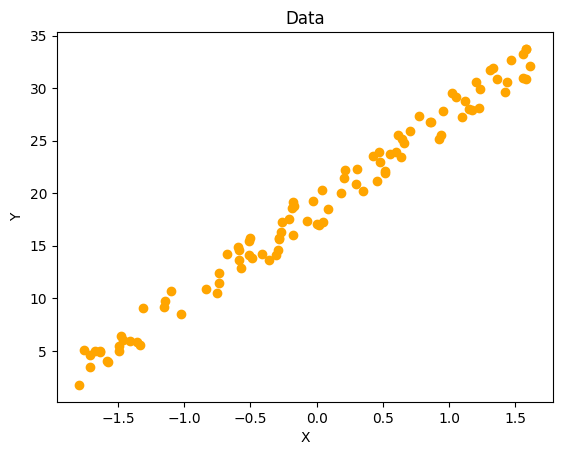

In [6]:
plotData(X,y)
X = normalisedata(X)
plotData(X,y)

In [7]:
X.mean()

-7.993605777301127e-17

In [8]:
X.std()

1.0

In [9]:
def trainTestsplit(X,y, split = 0.8):
    m = X.shape[0]
    data = np.zeros((m,2))

    data[: , 0] = X
    data[: , 1] = y
    np.random.shuffle(data)
    split = int(m*split)
    XT = data[:split,0]#XT = xtrain
    yT = data[:split,1]#yT = ytrain

    xt = data[split:,0]#xt = xtest
    yt = data[split: ,1]#yt = ytest

    return XT,yT,xt,yt

    


In [10]:
XT,yT,xt,yt = trainTestsplit(X,y)

In [11]:
print(XT.shape,yT.shape)
print(xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


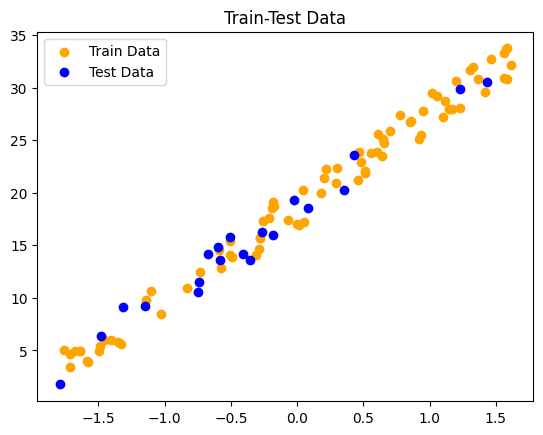

In [13]:
plt.scatter(XT,yT,color = "orange",label = "Train Data")
plt.scatter(xt,yt,color = "blue", label = "Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [20]:
#Hypothesis
def hypothesis(X,theta):
    #h(x) = theta0 + theta1*X X = scalar matrix
    return theta[0] + theta[1]*X

def error(X,y,theta):
    m = X.shape[0]
    e = 0      #let total error is zero
    for i in range(m):
        y_i = hypothesis(X[i],theta) # y_i = y hat  of i
        e = e + (y[i] - y_i)**2


    return e/(2*m)


def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += exp
     
        grad[1] += exp*X[i]

    return grad/m    

def train(X,y,learning_rate = 0.1):
    theta = np.zeros((2,))

    error_list = []
    maxItra = 100    #maxItra = maximum number of iteration

    for i in range(maxItra):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    plt.xlabel("iteration Number")
    plt.ylabel("Loss")
    
    plt.plot(error_list)    
    return theta


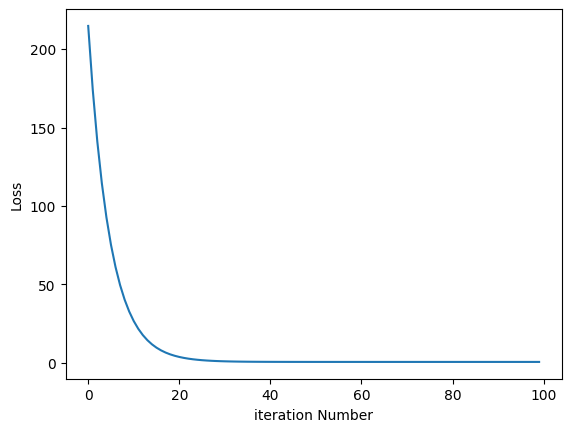

In [21]:
theta = train(X,y)

In [22]:
theta

array([18.74076878,  8.77248819])

In [25]:
def predict(X,theta):
    return hypothesis(X,theta)

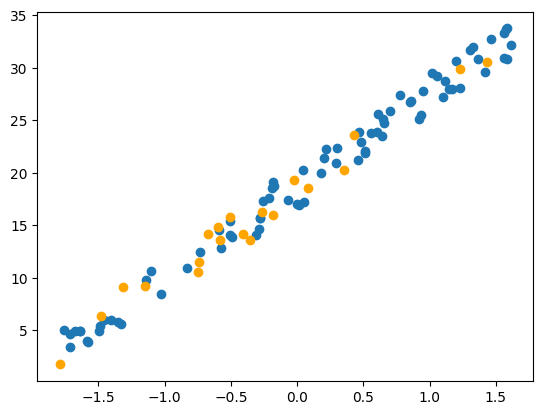

In [24]:
plt.scatter(XT,yT)
plt.scatter(xt,yt,color = 'orange')
plt.show()

In [26]:
yp = predict(xt,theta)

In [27]:
xt.shape

(20,)

In [28]:
yp.shape

(20,)

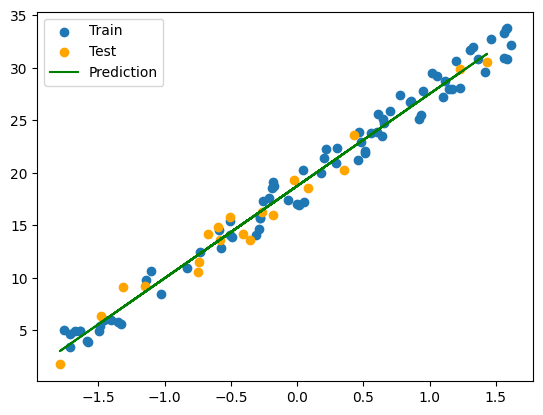

In [33]:
plt.scatter(XT,yT,label = "Train")
plt.scatter(xt,yt,color = 'orange',label = "Test")
plt.plot(xt,yp,color = 'green',label = "Prediction")
plt.legend()
plt.show()

In [35]:
#model Evaluation
def r2score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y-ymean)**2)

    return 1 - num/denom

r2score(yt,yp)


0.9718898336708853

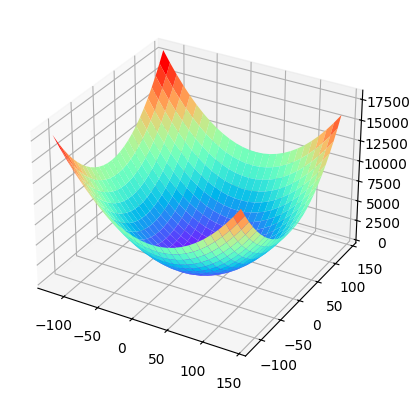

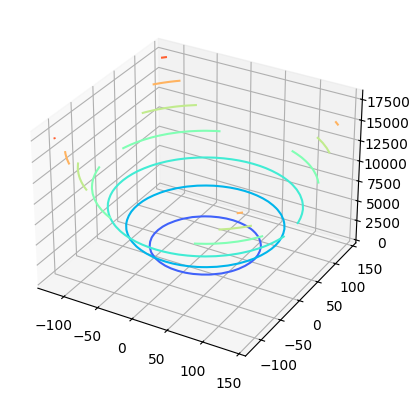

In [38]:

T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)


T0, T1 = np.meshgrid(T0, T1)

J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i, j] * X + T0[i, j]
        J[i, j] = np.mean((y - yp) ** 2) / 2


fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')  
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')  
plt.show()


In [44]:
#Trace the trajectory ofgradient
def train(X,y,learning_rate = 0.1):
    theta = np.array([-150,100])

    error_list = []
    maxItra = 100    #maxItra = maximum number of iteration
    #note down the values of theta
    theta_list = []


    for i in range(maxItra):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
       
    return theta,theta_list,error_list


In [45]:
theta,theta_list,error_list = train(XT,yT)


In [46]:
theta_list= np.array(theta_list)

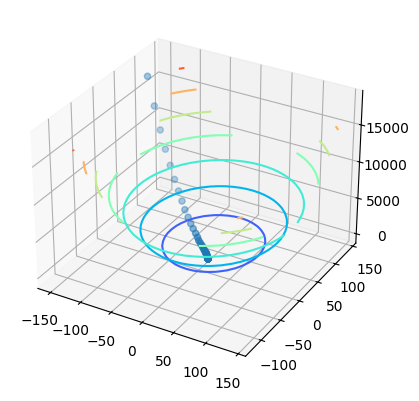

In [47]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='rainbow') 
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

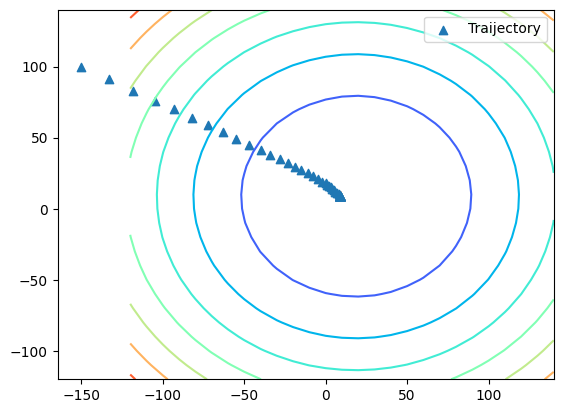

In [49]:
#2D contour plot (Top view)
plt.contour(T0,T1,J,cmap = 'rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label = 'Traijectory')
plt.legend()
plt.show()